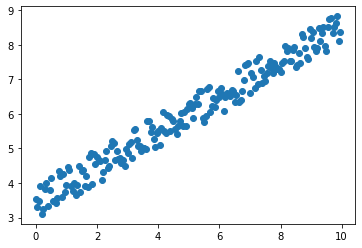

In [60]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0,10,0.05).reshape(-1, 1)
np.random.seed(100)
y = 0.5 * np.arange(0,10,0.05) + 3 + np.random.rand(len(X))

plt.scatter(X.reshape(1, -1), y)

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)



In [62]:
class LinearRegression:
    def __init__(self, eta=0.02, n_iters = 1e4, epsilon = 1e-3):
        
        self._theta = None
        self._eta = eta
        self._n_iters = n_iters
        self._epsilon = epsilon
        
    def Cost(self, theta, X_b, y):
        try:
            return np.sum(np.square(y - X_b.dot(theta))) / len(X_b)
        except:
            return float('inf')

    def dCost(self, theta, X_b, y):
        return (X_b.dot(theta) - y).dot(X_b) * 2 / len(X_b)

    def gradient_descent(self, X_b, y, initial_theta, eta, n_iters, epsilon):
        theta = initial_theta
        eta = self._eta
        n_iters = self._n_iters
        epsilon = self._epsilon
        
        i_iter = 0
        try:
            while i_iter < n_iters:
                gradient = self.dCost(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient

                diff = abs(self.Cost(theta, X_b, y) - self.Cost(last_theta, X_b, y))
                if (diff > 1e100):
                    print('eta is too large!')
                    break
                if (diff  < epsilon):
                    break
                i_iter += 1

            self._theta = theta
        except:
            self._theta = float('inf')
        return self

    def fit(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], 'train data has wrong dimenssion'
        self._X_train = X_train
        self._y_train = y_train
        
        X_b = np.hstack([np.ones((len(self._X_train), 1)), self._X_train])
        initial_theta = np.zeros(X_b.shape[1])
        eta = 0.01
        
        self.gradient_descent(X_b, y_train, initial_theta, self._eta, self._n_iters, self._epsilon)
        
        return self
    
    def predict(self, X_test):
        X_b = np.hstack([np.ones((len(X_test), 1)), X_test])
        return np.dot(X_b, self._theta)
    

In [72]:
linear_regression = LinearRegression(
    epsilon = 1e-6,
    eta = 0.02
)

linear_regression.fit(X_train, y_train)
y_predict = linear_regression.predict(X_test)
params = linear_regression._theta
params

array([3.45402168, 0.51257892])

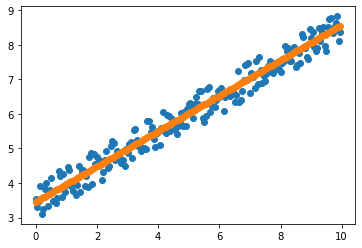

In [70]:
plt.scatter(X.reshape(1, -1), y)

theta = params[1]
b = params[0]

X = np.arange(0,10,0.05).reshape(-1, 1)
y_predict = theta * X + b

plt.scatter(X, y_predict)

In [77]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)
y_predict = linear_regression.predict(X_test)
linear_regression.coef_, linear_regression.intercept_

(array([0.51042252]), 3.4682654875517605)

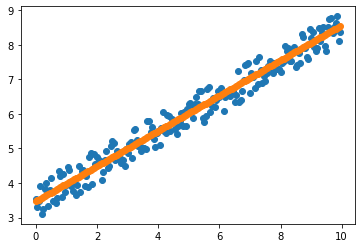

In [78]:
plt.scatter(X.reshape(1, -1), y)

theta = params[1]
b = params[0]

X = np.arange(0,10,0.05).reshape(-1, 1)
y_predict = linear_regression.coef_ * X + linear_regression.intercept_

plt.scatter(X, y_predict)